In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib.colors as mcolors
import networkx as nx
import pickle

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.aln import ALNModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.control.optimal_control import oc_aln, cost_functions
from neurolib.control.optimal_control.oc_utils.plot_oc import plot_oc_nw

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

options = {
    'node_color': 'lightgray',
    'node_size': 1000,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 20,
    'font_size' : 20,
    'font_weight' : 'bold',
    }

dir = "images_4n_aln"

def getfinalstate(model):
    N = model.params.Cmat.shape[0]
    V = len(model.state_vars)
    T = model.getMaxDelay() + 1
    state = np.zeros((N, V, T))
    for v in range(V):
        if "rates" in model.state_vars[v] or "IA" in model.state_vars[v]:
            for n in range(N):
                state[n, v, :] = model.state[model.state_vars[v]][n, -T:]
        else:
            for n in range(N):
                state[n, v, :] = model.state[model.state_vars[v]][n]
    return state

def setinitstate(model, state):
    N = model.params.Cmat.shape[0]
    V = len(model.init_vars)
    T = model.getMaxDelay() + 1

    for n in range(N):
        for v in range(V):
            if "rates" in model.init_vars[v] or "IA" in model.init_vars[v]:
                model.params[model.init_vars[v]] = state[:, v, -T:]
            else:
                model.params[model.init_vars[v]] = state[:, v, -1]

    return

def getstate(model):
    state = np.concatenate(  ( np.concatenate((model.params["rates_exc_init"][:, np.newaxis, -1],
                                            model.params["rates_inh_init"][:, np.newaxis, -1],
                                            model.params["IA_init"][:, np.newaxis, -1], ), axis=1, )[:, :, np.newaxis],
                            np.stack((model.rates_exc, model.rates_inh, model.IA), axis=1),),axis=2,  )
    
    return state

In [3]:
def draw_nwgraph(cmat, filename):
    G = nx.DiGraph() 
    for n in range(cmat.shape[0]):
            for l in range(cmat.shape[1]):
                if cmat[n,l] != 0:
                    G.add_edge(l,n)
    nx.draw(G, with_labels=True, arrows=True, **options)
    plt.savefig(os.path.join(dir,filename), bbox_inches='tight')
    plt.show()

def getperiods(x, dt, N, prominence=0.1, interval=(None, None)):

    timing_list = [None for n in range(N)]
    periods_list = [None for n in range(N)]

    if interval[0] is None:
        interval[0] = 0
    if interval[1] is None:
        interval[1] = -1

    for n in range(N):
        timing_list[n] = scipy.signal.find_peaks(x[n, 0, interval[0]:interval[1]], prominence=prominence)[0]
        periods_list[n] = []
        if len(timing_list[n]) < 3:
            continue
        for pind in range(1, len(timing_list[n])):
            periods_list[n].append(dt * (timing_list[n][pind]-timing_list[n][pind-1]))

    return timing_list, periods_list

def getperiod(x, dt):
    periods = []
    for n in range(x.shape[0]):
        peaks = scipy.signal.find_peaks(x[n,:])[0]
        for p in range(2, len(peaks)-1):
            periods.append(peaks[p] - peaks[p-1])
        
        return np.mean(periods) * dt
    

def get_sim(c0list, state, N):
    distsum = 0.
    for n in range(N):
        cycle0 = c0list[n]
        cycle1 = getshape(state[n,0,:])

        dtw_distance, warp_path = fastdtw(cycle0, cycle1, dist=euclidean)
        distsum += dtw_distance
    
    return distsum

def getshape(x):
    peaks = scipy.signal.find_peaks(x, prominence=0.01)[0]
    if len(peaks) < 3:
        print("did not find peaks")
        i0, i1 = 0, -1
    else:
        i0, i1 = peaks[1], peaks[2]
    return x[i0:i1]


In [4]:
N = 4
cmats, dmats = [], []

cmats[0] = 

5
10


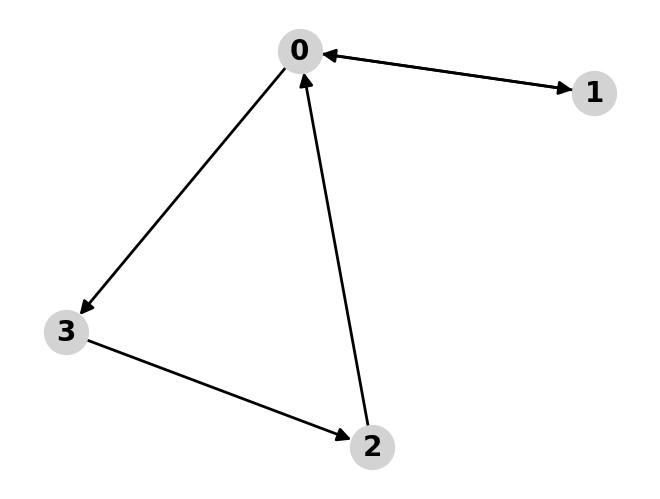

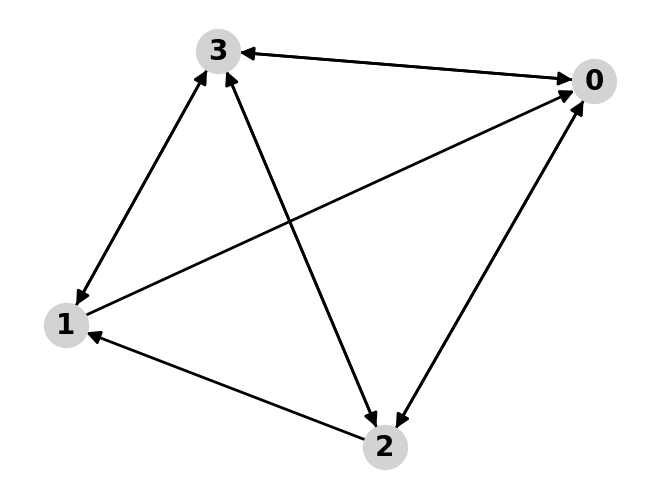

In [5]:
while len(cmats) < 2:
    p_connect = 0.1 * (len(cmats) + 2)**2
    p_inv = 1. - p_connect
    cmat = np.random.choice([0, 1], size=(N,N), p=[p_inv, p_connect])
    use = True
    for n in range(N):
        cmat[n, n] = 0
        if np.amax(cmat[n,:]) == 0:
            use = False
            break
        if np.amax(cmat[:,n]) == 0:
            use = False
            break

    for j in range(len(cmats)):
        if (cmat == cmats[j]).all():
            use = False

    if not use:
        continue

    print(np.sum(cmat))
    cmats.append(cmat)

    dmat = np.random.random((N, N))
    for n1 in range(N):
        for n2 in range(N):
            dmat[n1, n2] *= 30. * cmat[n1,n2]

    dmats.append(np.around(dmat, 0))

for i in range(len(cmats)):
 
    draw_nwgraph(cmats[i], "network_" + str(i) + ".png")
    #print(dmats[-1])

In [15]:
colors = []
n = 0
for col in mcolors.TABLEAU_COLORS:
    colors.append(col)
    n += 1
    if n >= N: break

points = [ [0.5, 0.2], [1.0, 0.5] ]
periods_array = np.zeros((len(cmats), len(points)))

----------------
0 0


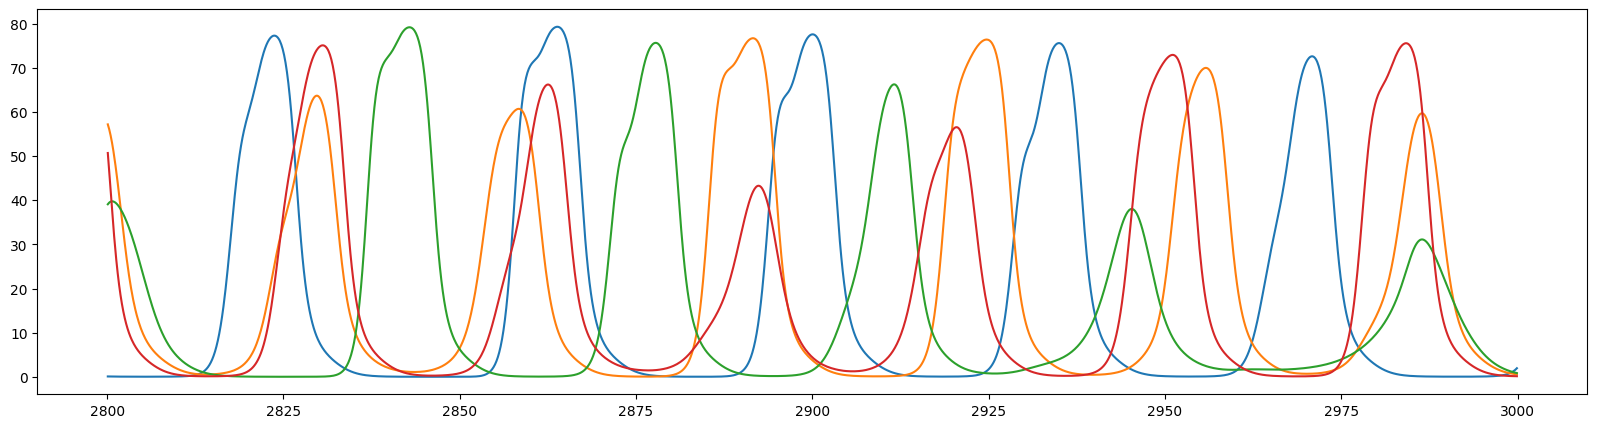

period =  36.785714285714285
period diff =  -0.7142857142857153
amplitudes =  [79.5180215382097, 77.45580592640681, 79.21943041599104, 75.68818479841639]
----------------
0 1


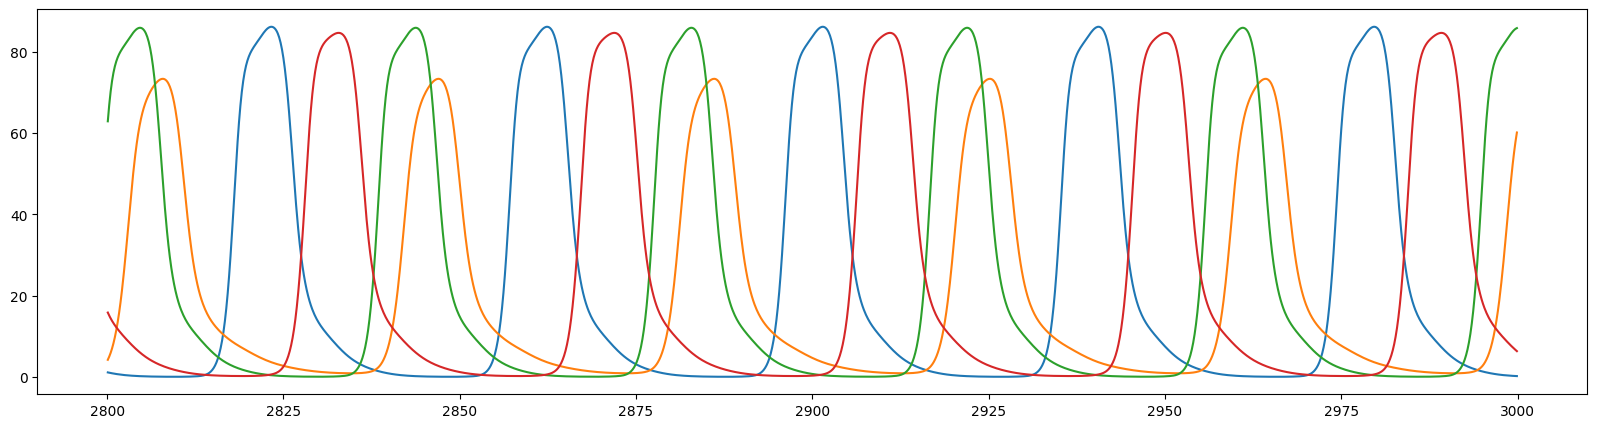

period =  39.1
period diff =  0.0
amplitudes =  [86.10018584043895, 74.0632831446322, 85.87439666614598, 84.75251071445926]
----------------
1 0


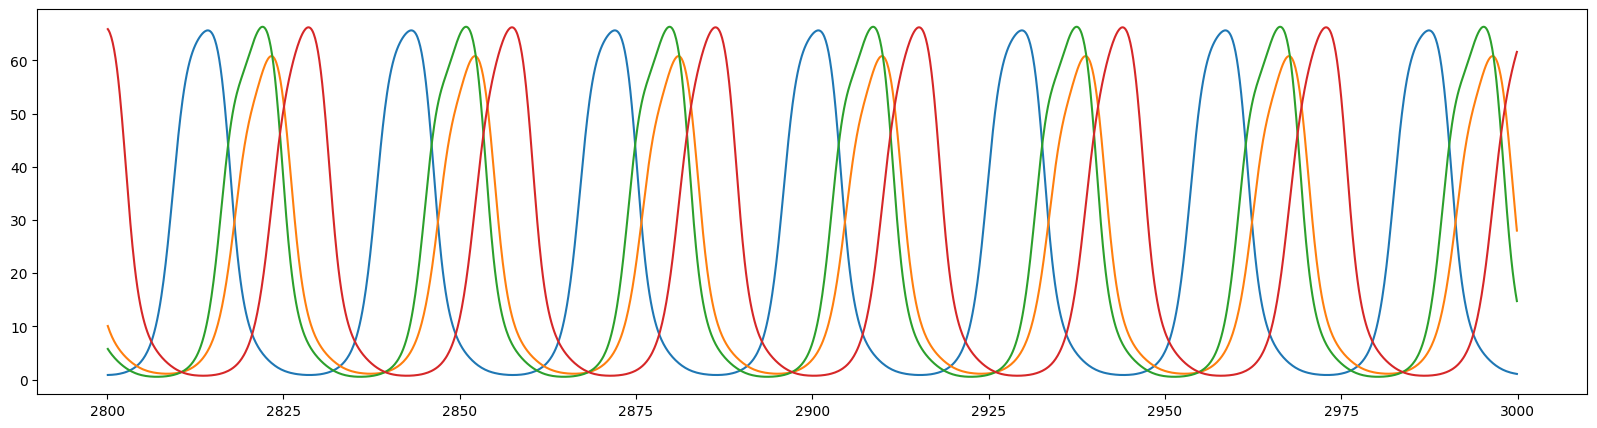

period =  28.863636363636363
period diff =  0.0
amplitudes =  [65.70712861136602, 67.22968417644371, 71.31277563974203, 71.81469390616594]
----------------
1 1


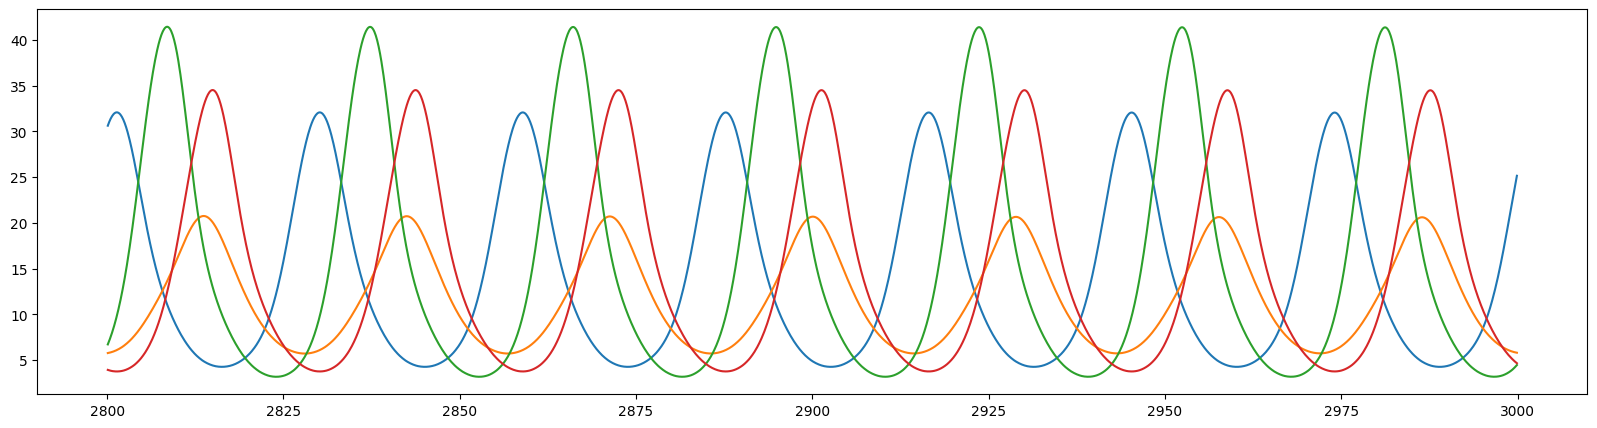

period =  28.78
period diff =  0.0345454545454551
amplitudes =  [35.20462277199352, 43.37350967923096, 46.877889452568155, 39.1005595458855]


In [157]:
plt_list = []
i0, i1 = -2000, -1

for c in range(len(cmats)):
    model = ALNModel(Cmat=cmats[c], Dmat=dmats[c])

    dt = model.params['dt']
    model.params['duration'] = 3. * 1000
    model.params.signalV = 1.

    zero_input = ZeroInput().generate_input(duration=model.params['duration']+model.params.dt, dt=model.params.dt)
    rect_input = np.vstack( (zero_input)*2 )
    rect_input[0,:500] = -5.
    rect_input[0,5000:5500] = 5.


    for pind in range(len(points)):
        print("----------------")
        print(c, pind)
        model.params.mue_ext_mean = points[pind][0]
        model.params.mui_ext_mean = points[pind][1]
        model.params["ext_exc_current"] = rect_input[0,:]
        model.run()

        if [c, pind] in plt_list or True:
            fig, ax = plt.subplots(figsize=(20,5))
            for n in range(N):
                ax.plot(model.t[i0:i1], model.rates_exc[n,i0:i1], color=colors[n])
            plt.savefig(os.path.join(dir, "dynamics_" + str(c) + "_" + str(pind) + ".png"))
            plt.show()

        periods_array[c, pind] = getperiod(model.rates_exc[:,-4000:], dt)
        print("period = ", periods_array[c, pind])
        alt_period = getperiod(model.rates_exc[:,16000:20000], dt)
        print("period diff = ", periods_array[c, pind] - alt_period)

        amps = []
        for n in range(N):
            amps.append(np.amax(model.rates_exc[n,11000:]))

        print("amplitudes = ", amps)

        results["shape0"][c][pind] = []
        for n in range(N):
            results["shape0"][c][pind].append(getshape(model.rates_exc[0,-2000:]))

        results["init"][c][pind] = getfinalstate(model)

In [55]:
controlmat = np.zeros((N,2))
controlmat[:,0] = 1.

costmat = np.zeros((N, 3))
costmat[:,0] = 1.

duration = 150.
model.params.duration = duration
zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
zero_control = np.vstack( ([zero_input]*N))


In [65]:

w2_n = 3

results = dict()
results["controls"] = [[[[ None for x1 in range(w2_n) ] for x2 in range(4)] for x3 in range(len(points))] for x4 in range(len(cmats)) ]
results["periods"] =  [[[[ None for x1 in range(w2_n) ] for x2 in range(4)] for x3 in range(len(points))] for x4 in range(len(cmats)) ]
results["timings"] =  [[[[ None for x1 in range(w2_n) ] for x2 in range(4)] for x3 in range(len(points))] for x4 in range(len(cmats)) ]
results["states"] =   [[[[ None for x1 in range(w2_n) ] for x2 in range(4)] for x3 in range(len(points))] for x4 in range(len(cmats)) ]
results["nat_periods"] =  np.zeros((len(cmats), len(points), 4, w2_n))
results["w2"] = np.zeros((len(cmats), len(points), 4, w2_n ))
results["L2cost"] = np.zeros((len(cmats), len(points), 4, w2_n ))
results["distance"] = np.zeros((len(cmats), len(points), 4, w2_n ))

In [52]:
results["shape0"] = [[ None for x3 in range(len(points))] for x4 in range(len(cmats)) ]
results["init"] = [[ None for x3 in range(len(points))] for x4 in range(len(cmats)) ]

c =  0
pind =  0
target period =  37.0625
imet =  0
Optimal control with target oscillation period
L2 cost =  516.0828736152807
Compute control for a deterministic system
Cost in iteration 0: 0.6499924420163907
Final cost : 0.6499924420163907


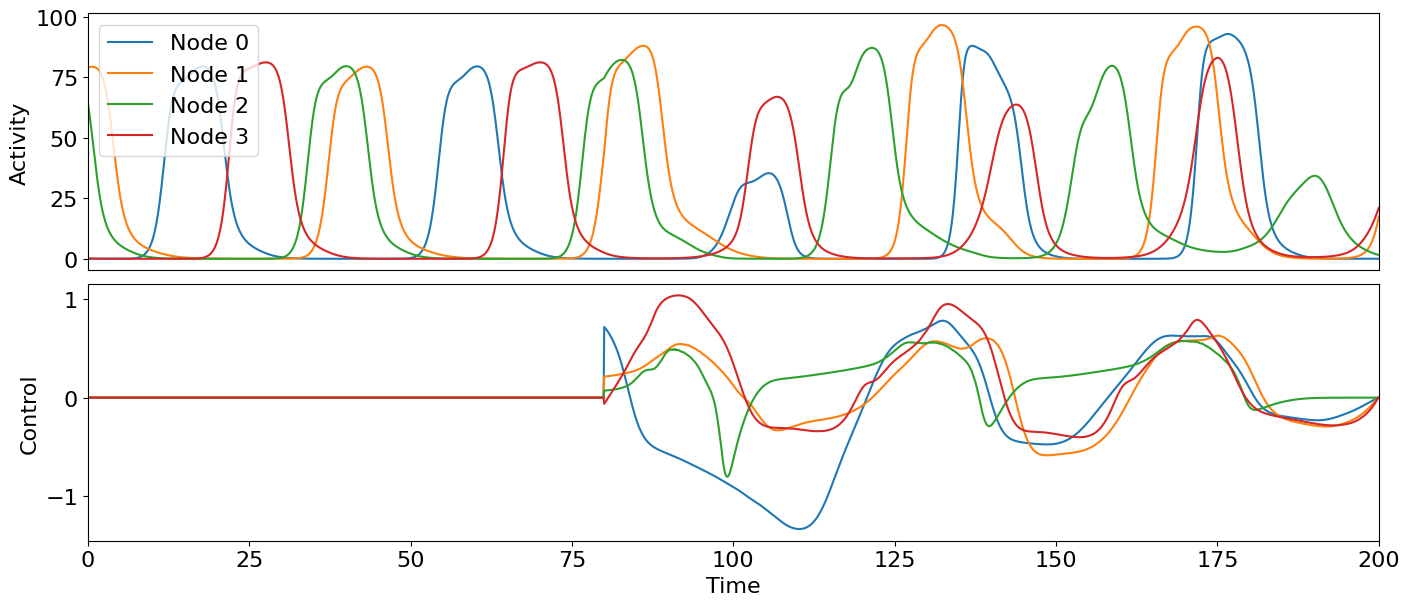

imet =  1
Optimal control with target oscillation period
L2 cost =  171.24660036479537
Compute control for a deterministic system
Cost in iteration 0: -3442.3522694973262
Final cost : -3442.3522694973262


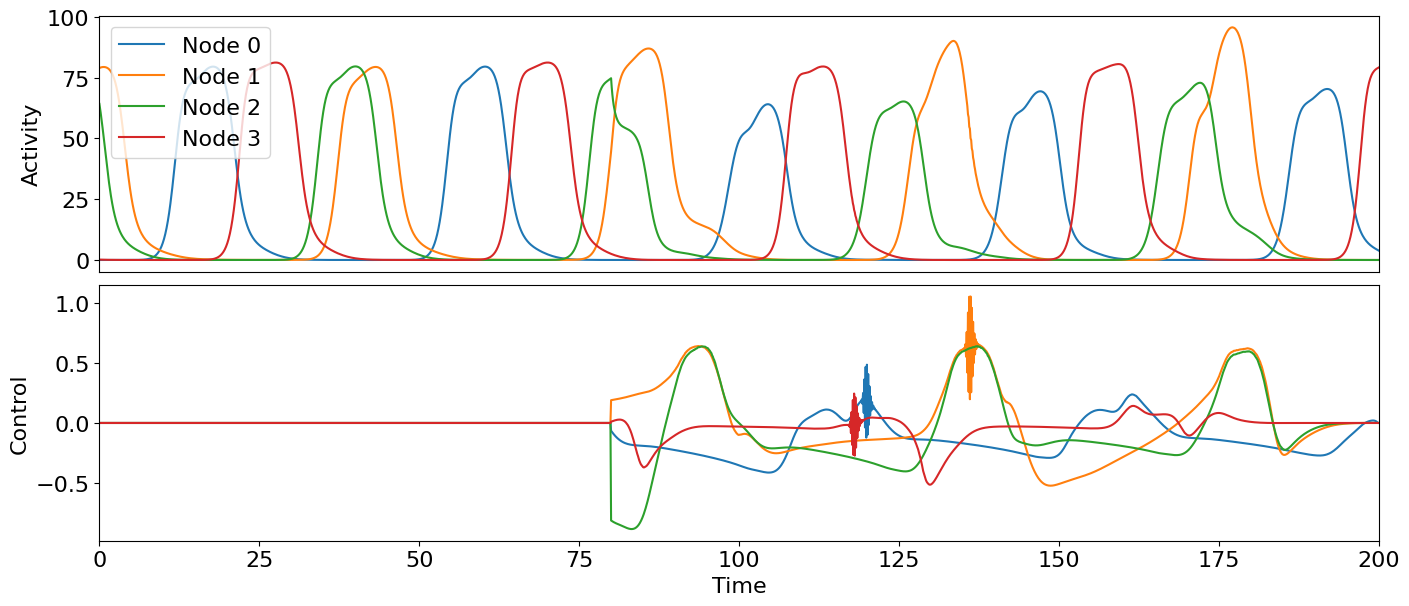

imet =  2
Optimal control with target oscillation period
L2 cost =  196.7395800315011
Compute control for a deterministic system
Cost in iteration 0: -227.37877464262
Final cost : -227.37877464262


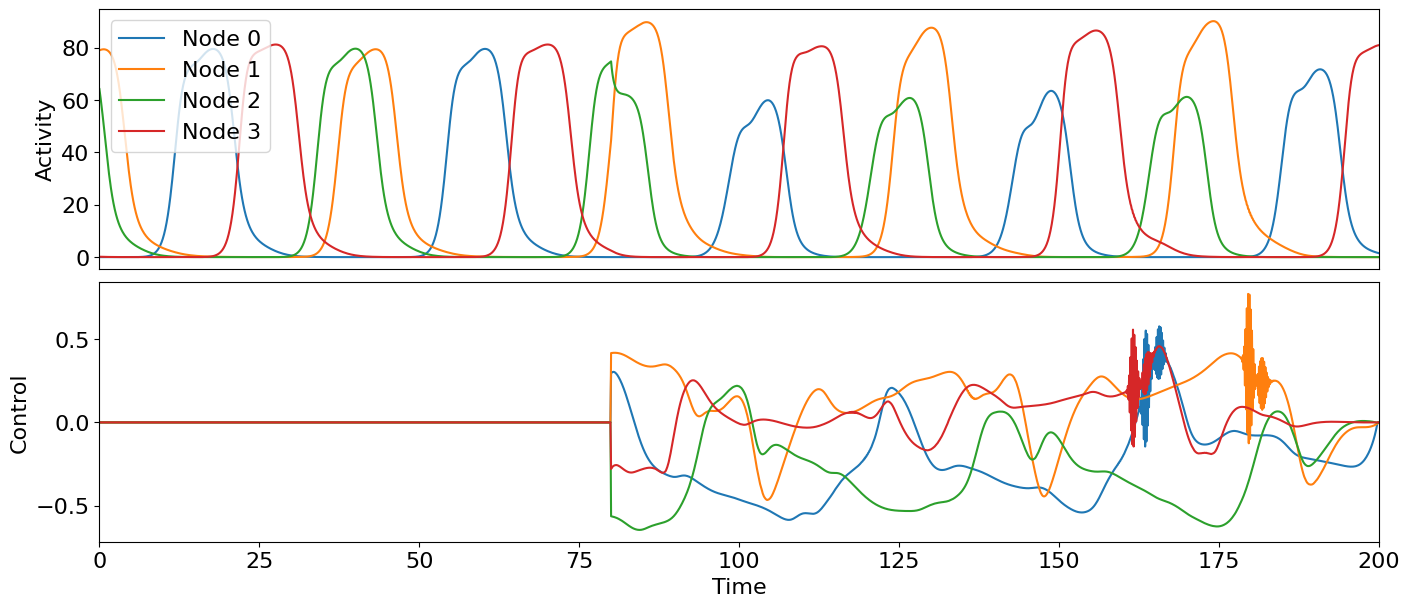

imet =  3
Optimal control with target oscillation period
L2 cost =  342.3497095238769
Compute control for a deterministic system
Cost in iteration 0: 39921.48086596891
Final cost : 39921.48086596891


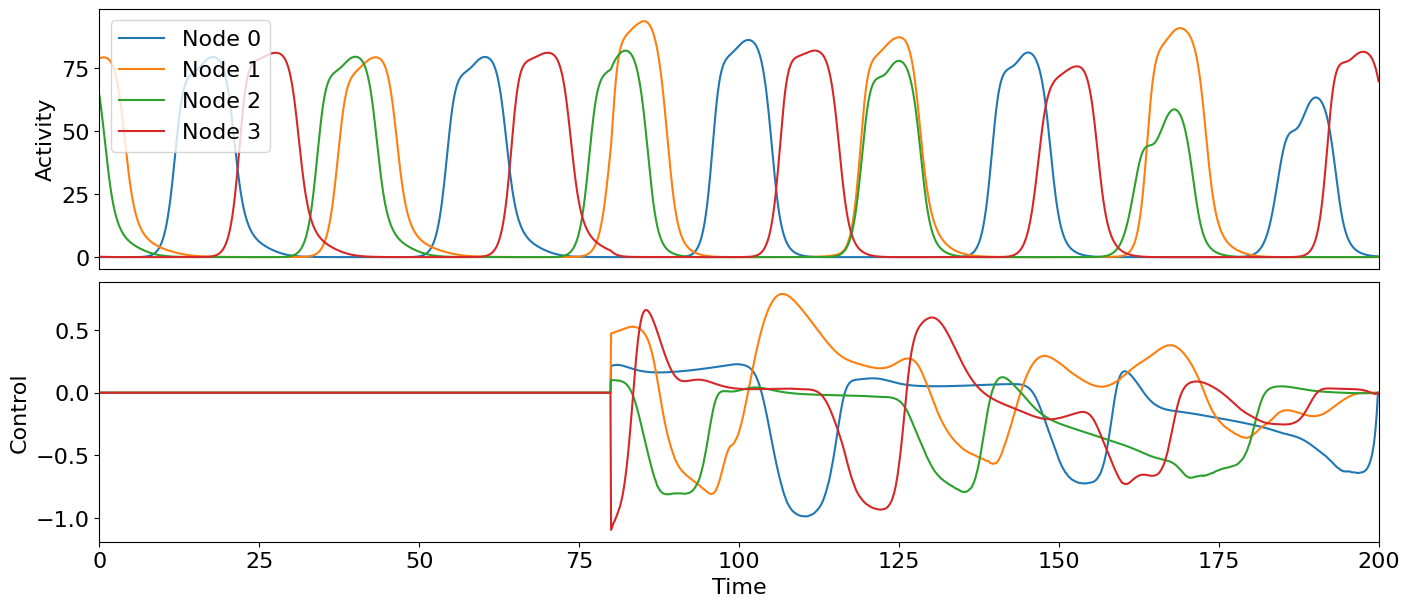

pind =  1
target period =  39.08571428571429
imet =  0
Optimal control with target oscillation period
L2 cost =  401.8227750039282
Compute control for a deterministic system
Cost in iteration 0: -68.3734286252775
Final cost : -68.3734286252775


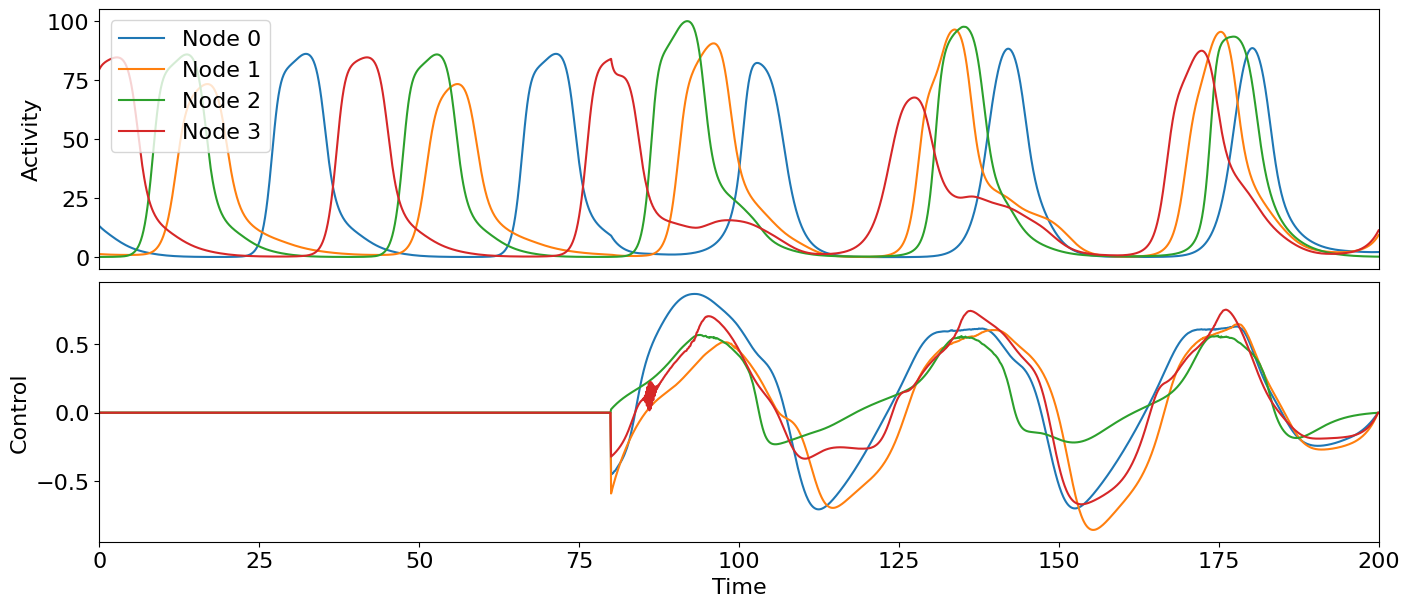

imet =  1
Optimal control with target oscillation period
L2 cost =  438.5460514789479
Compute control for a deterministic system
Cost in iteration 0: -12392.538795243527
Final cost : -12392.538795243527


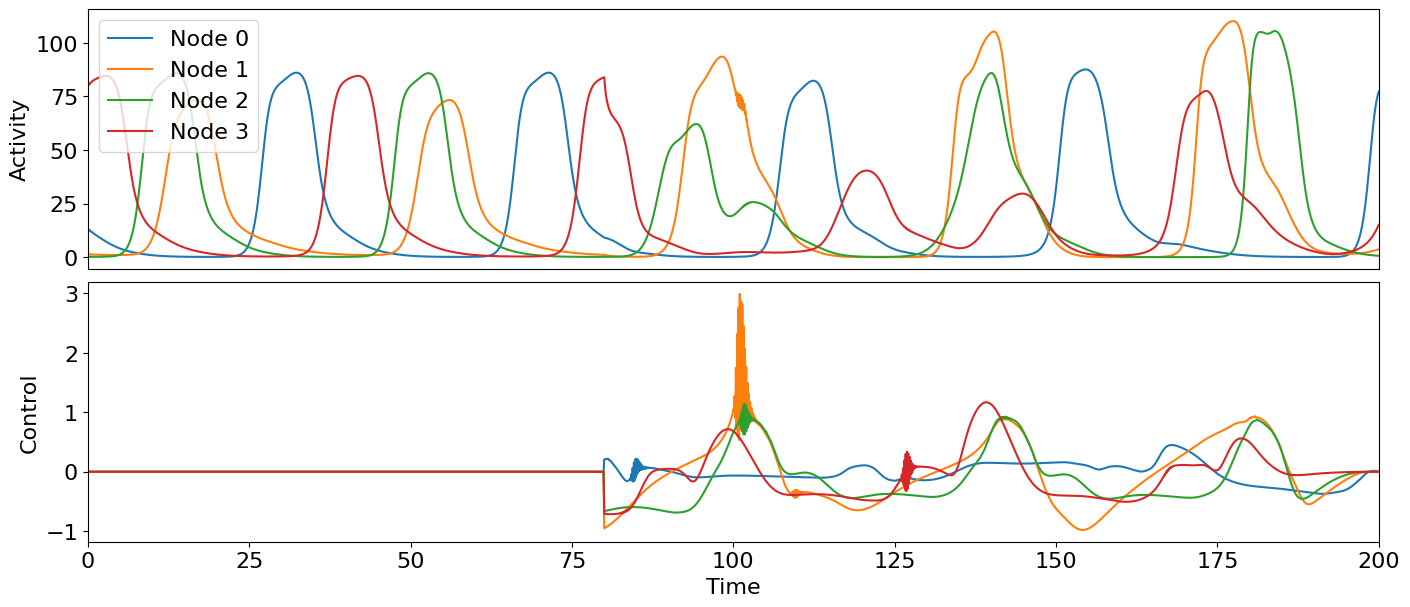

imet =  2
Optimal control with target oscillation period
L2 cost =  366.65830371688094
Compute control for a deterministic system
Cost in iteration 0: 475.22278671540636
Final cost : 475.22278671540636


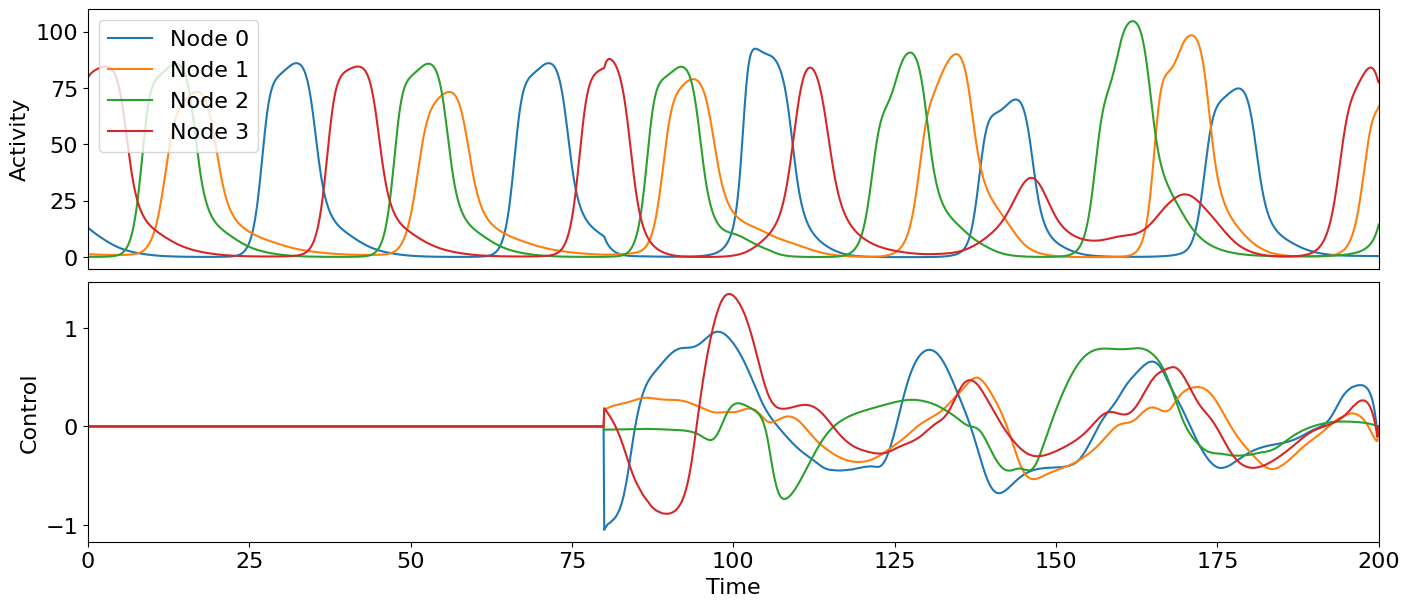

imet =  3
Optimal control with target oscillation period
L2 cost =  80.82019796021126
Compute control for a deterministic system
Cost in iteration 0: 38458.70191706987
Final cost : 38458.70191706987


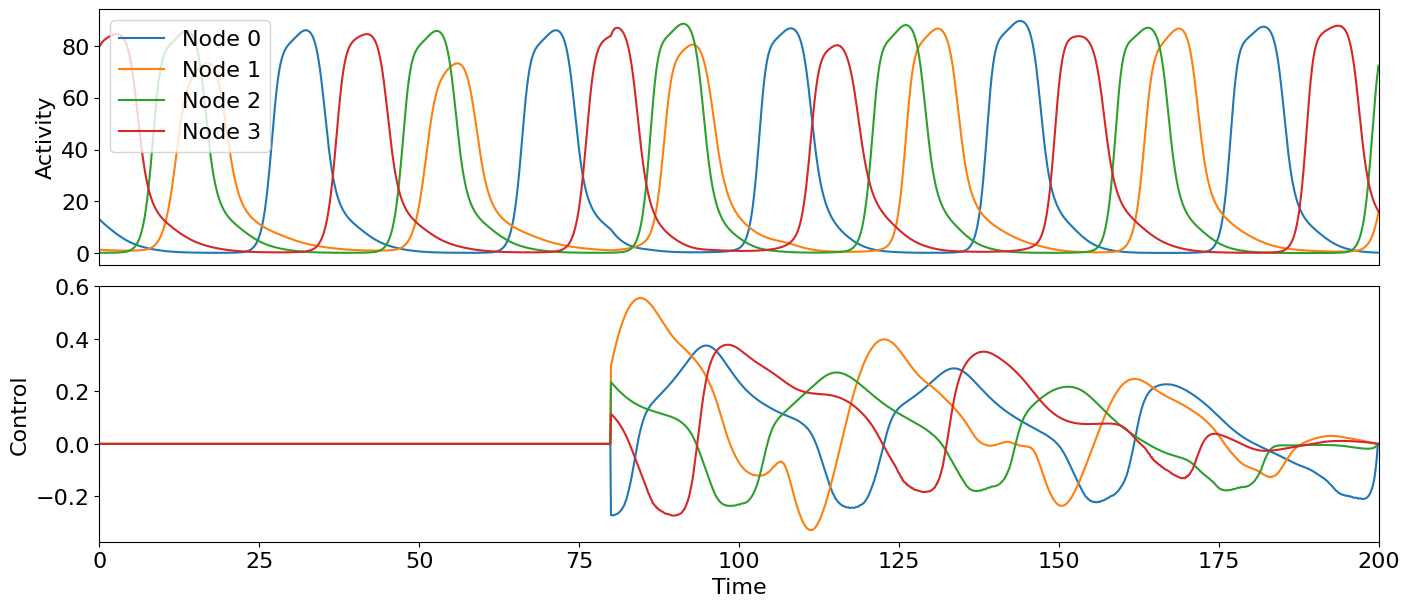

c =  1
pind =  0
target period =  28.654545454545456
imet =  0
Optimal control with target oscillation period
L2 cost =  336.3023865819234
Compute control for a deterministic system
Cost in iteration 0: -77.41193301485924
Final cost : -77.41193301485924


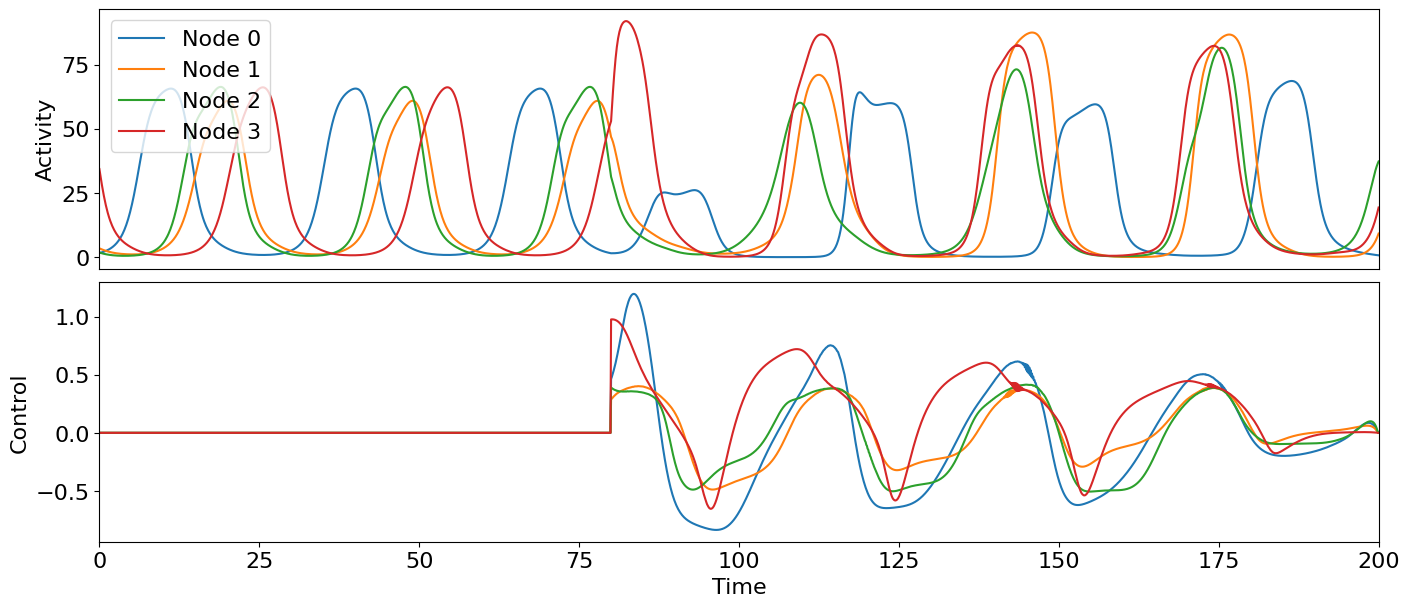

imet =  1
Optimal control with target oscillation period
L2 cost =  586.5892301028696
Compute control for a deterministic system
Cost in iteration 0: 4579.255637380724
Final cost : 4579.255637380724


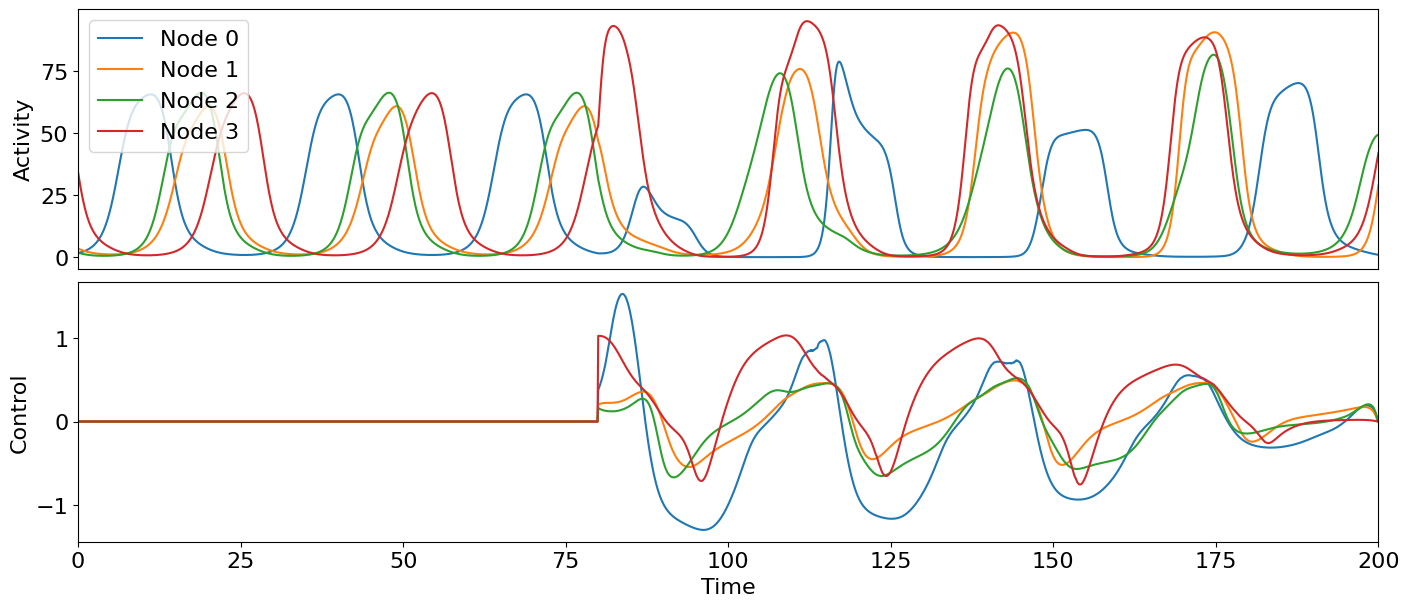

imet =  2
Optimal control with target oscillation period
L2 cost =  262.45529804378276
Compute control for a deterministic system
Cost in iteration 0: -83.69812085337719
Final cost : -83.69812085337719


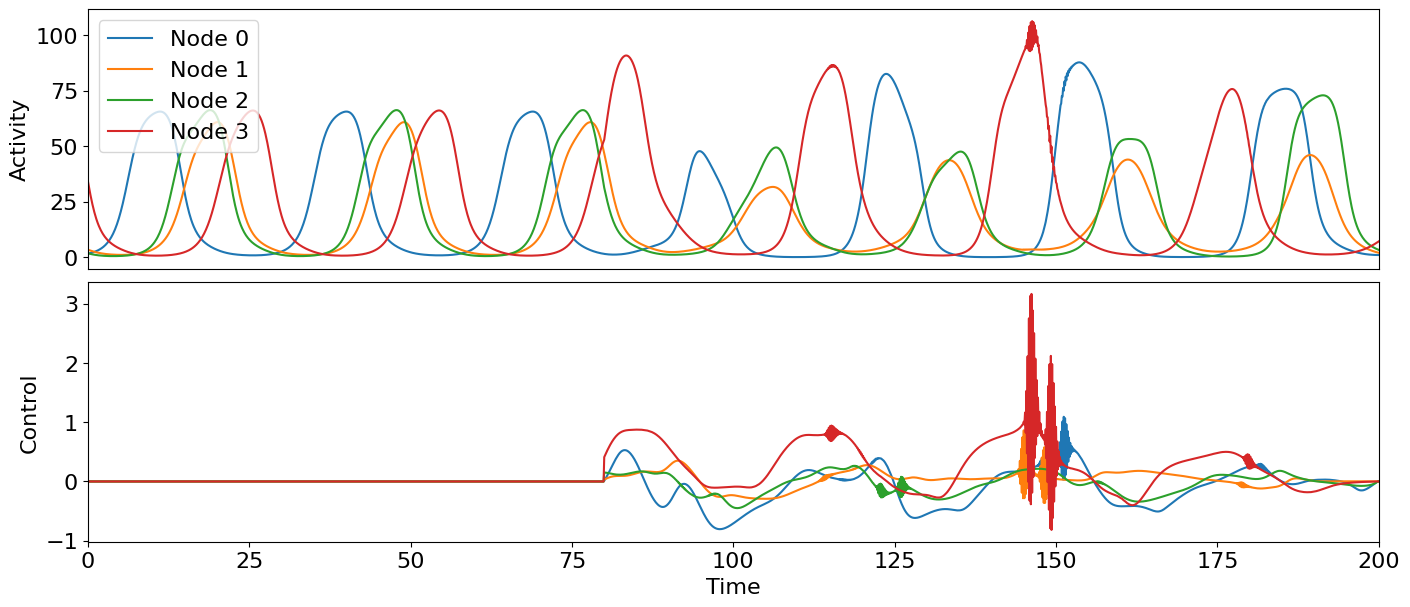

imet =  3
Optimal control with target oscillation period
L2 cost =  232.4594973894102
Compute control for a deterministic system
Cost in iteration 0: 30165.235936423767
Final cost : 30165.235936423767


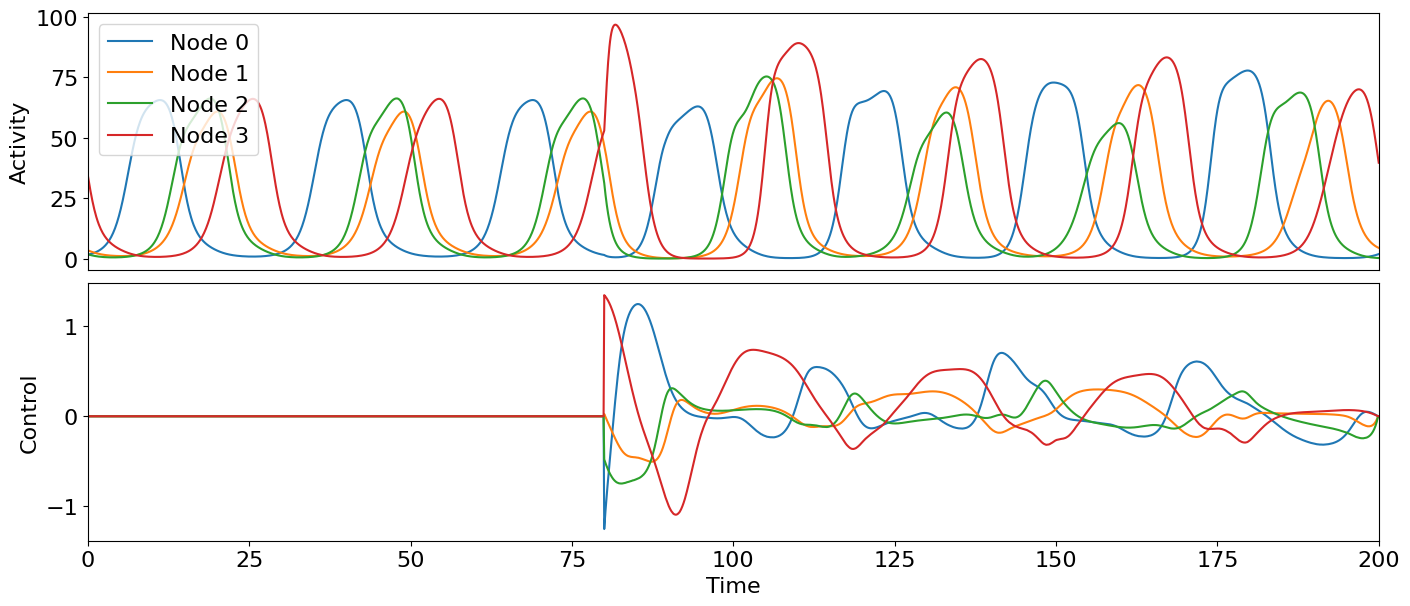

pind =  1
target period =  37.0
imet =  0
Optimal control with target oscillation period
L2 cost =  145.37069123789695
Compute control for a deterministic system
Cost in iteration 0: -66.92168844736555
Final cost : -66.92168844736555


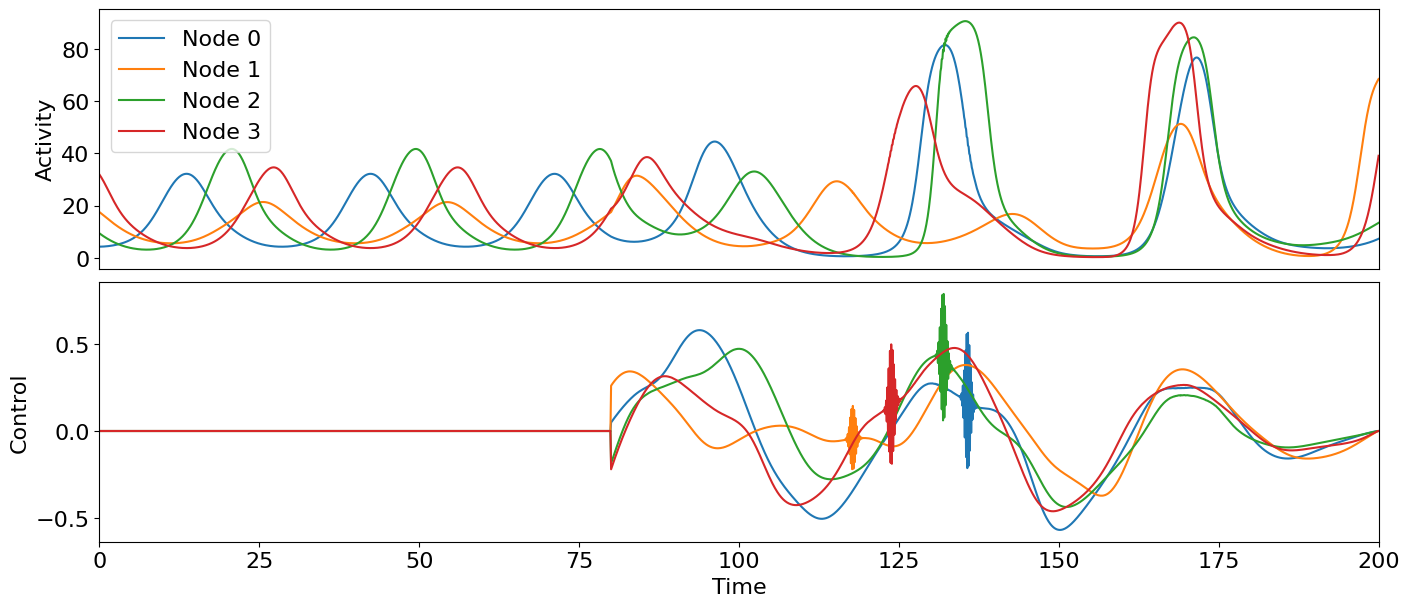

imet =  1
Optimal control with target oscillation period
L2 cost =  407.76391101101063
Compute control for a deterministic system
Cost in iteration 0: -57454.41217224744
Final cost : -57454.41217224744


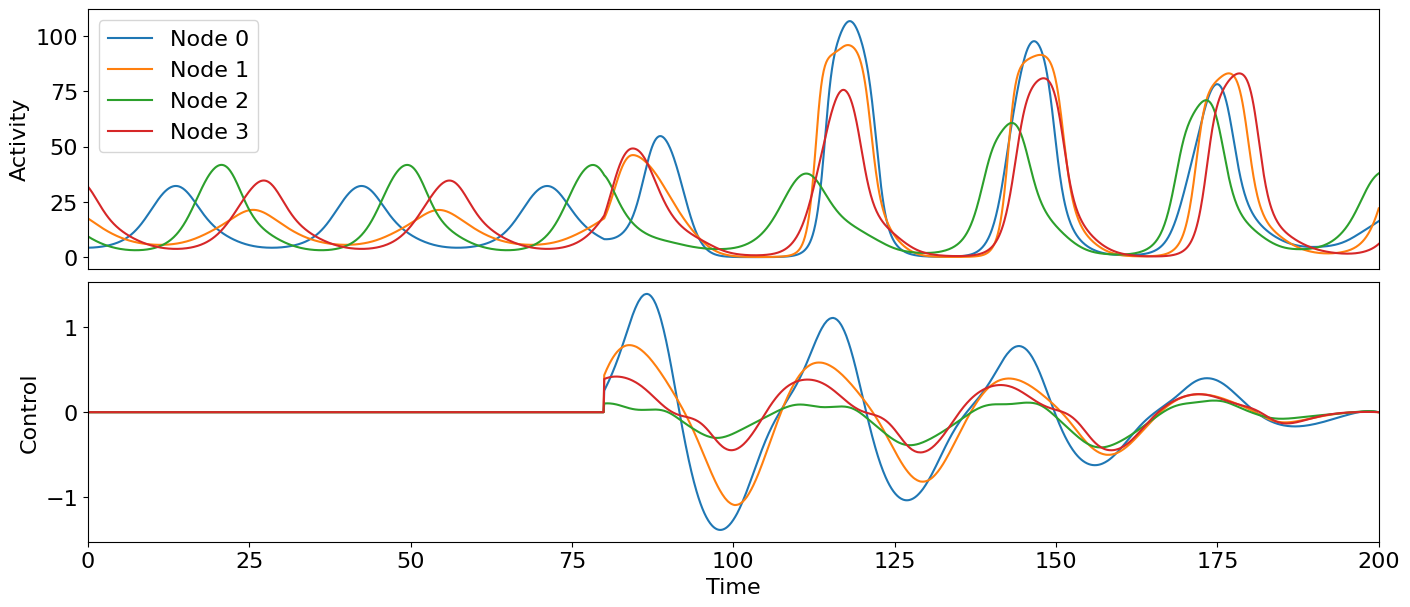

imet =  2
Optimal control with target oscillation period
L2 cost =  135.46175495907016
Compute control for a deterministic system
Cost in iteration 0: -728.4766204616444
Final cost : -728.4766204616444


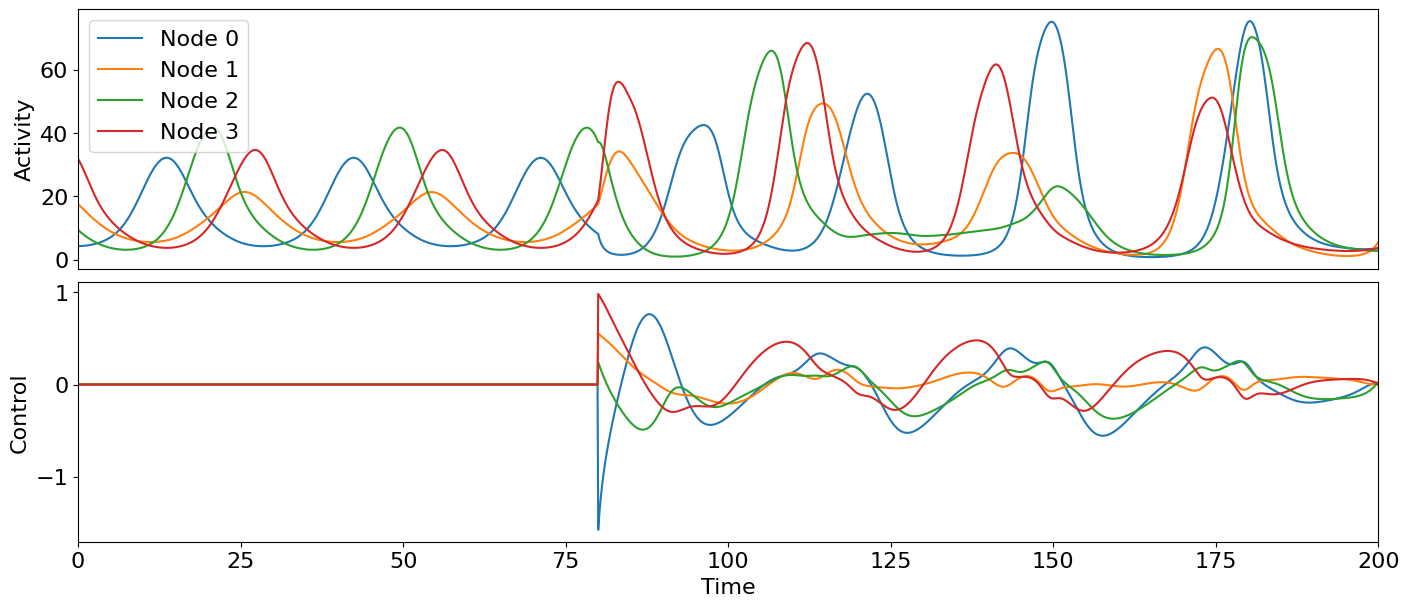

imet =  3
Optimal control with target oscillation period
L2 cost =  25.902251097597045
Compute control for a deterministic system
Cost in iteration 0: 5869.0885041289785
Final cost : 5869.0885041289785


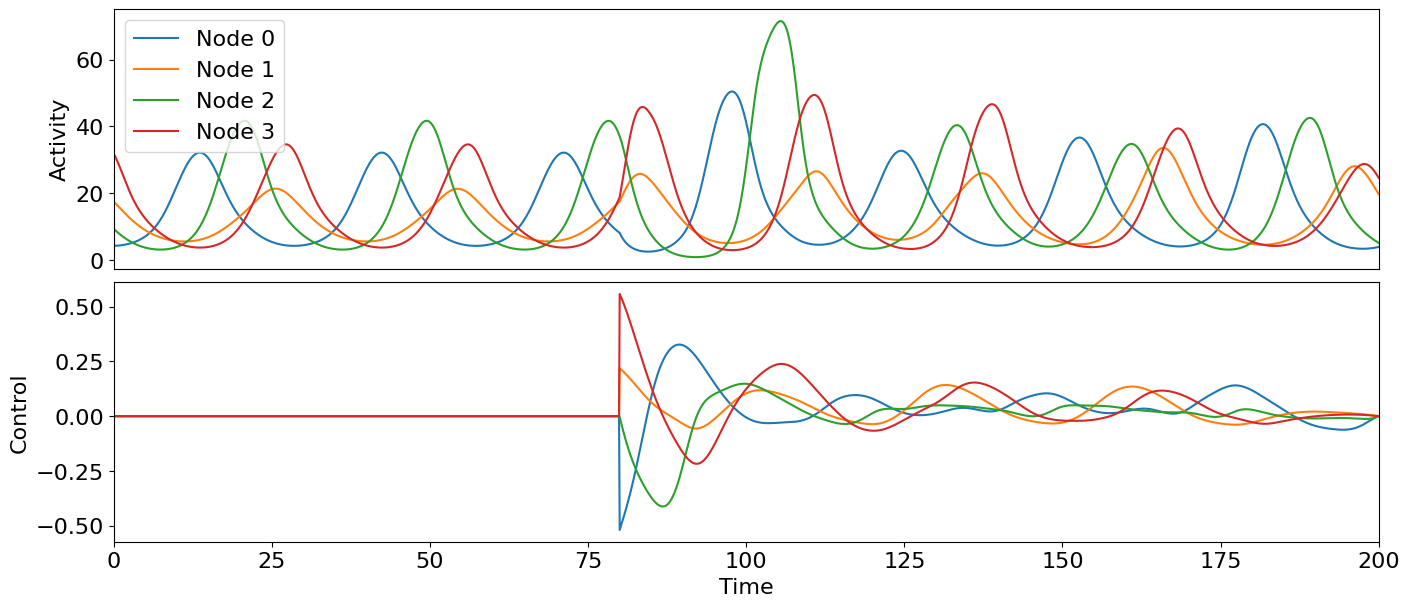

In [38]:
it = 0
pr = np.arange(0,2001,10)
maxstr = 10.
init_control = zero_control.copy()
LIMC = [400., 600.]

skip_array = [ ]

for c in range(len(cmats)):
    print("c = ", c)

    model = ALNModel(Cmat=cmats[c], Dmat=dmats[c])

    dt = model.params['dt']
    model.params.signalV = 1.

    nmaxdel = model.getMaxDelay()

    for pind in range(len(points)):

        print("pind = ", pind)

        if [c, pind] in skip_array:
            continue

        p = points[pind]
        
        testd = 1000.
        model.params.duration = testd
        model.params.mue_ext_mean = p[0]
        model.params.mui_ext_mean = p[1]
        model.params["ext_exc_current"] = zero_control[:,0,:]
        model.params["ext_inh_current"] = zero_control[:,1,:]

        einit = np.zeros((N, nmaxdel+1))
        iinit = np.zeros((N, nmaxdel+1))
        model.run()

        setinitstate(model, getfinalstate(model))

        model.params.duration = duration

        model.run()
            
        int0 = 800
        int1 = 2000

        print("target period = ", periods_array[c, pind])

        for imet in range(4):

            for wind in [0]:

                print("imet = ", imet)

                w2 = results["w2"][c, pind, imet, wind]
                    
                if w2 == 0:
                    w2 = 1e-1
                    if imet == 1:
                        w2 = 1e2
                    if imet == 2:
                        w2 = 1e0

                model_controlled = oc_aln.OcAln(model, periods_array[c, pind], print_array=pr, cost_interval=(int0,int1), control_interval=(int0,int1), cost_matrix=costmat, control_matrix = controlmat)
                model_controlled.maximum_control_strength = maxstr
                #model_controlled.channelwise_optimization = True
                model_controlled.step = 1e-4
                model_controlled.weights["w_p"] = 0.
                model_controlled.weights["w_2"] = w2

                if imet == 0:
                    model_controlled.weights["w_f_sync"] = 1.
                elif imet == 1:
                    model_controlled.weights["w_cc"] = 1.
                elif imet == 2:
                    model_controlled.weights["w_cc1"] = 1.
                elif imet == 3:
                    model_controlled.weights["w_var"] = 1.

                if type(results["controls"][c][pind][imet][wind]) != type(None):
                    model_controlled.control = results["controls"][c][pind][imet][wind].copy()
                    model_controlled.update_input()

                if results["w2"][c, pind, imet, wind] == 0:
                    model_controlled.optimize(60)
                    #fname = str(c) + "_" + str(pind) + "_" + str(imet) + "_" + str(wind) + ".png"
                    #plot_oc_nw(N, duration, dt, model_controlled.get_xs(), 200, model_controlled.control, filename= os.path.join(dir, fname))

                L2cost = np.sum(cost_functions.L2_cost(model_controlled.control))
                print("L2 cost = ", L2cost)

                while L2cost > LIMC[1]:
                    w2 *= 2.
                    model_controlled.weights["w_2"] = w2
                    print("control too strong, increase w2 to ", w2)
                    
                    model_controlled.control = zero_control
                    model_controlled.update_input()
                    model_controlled.step = 1e-2
                    model_controlled.zero_step_encountered = False
                    model_controlled.optimize(40)
                    L2cost = np.sum(cost_functions.L2_cost(model_controlled.control))
                    print("L2 cost = ", L2cost)

                    #fname = str(c) + "_" + str(pind) + "_" + str(imet) + "_" + str(wind) + ".png"
                    #plot_oc_nw(N, duration, dt, model_controlled.get_xs(), 200, model_controlled.control, filename= os.path.join(dir, fname))

                model_controlled.optimize(it)

                results["controls"][c][pind][imet][wind] = model_controlled.control.copy()
                state = model_controlled.get_xs()
                results["states"][c][pind][imet][wind] = state

                timings, periods = getperiods(state, dt, N, interval=(int0, int1))
                results["timings"][c][pind][imet][wind] = timings
                results["periods"][c][pind][imet][wind] = periods
                results["nat_periods"][c, pind, imet, wind] = periods_array[c, pind]
                #results["distance"][c, pind, imet, wind] = get_sim(state, N, periods_array[c, pind]/dt)
                results["w2"][c, pind, imet, wind] = w2
                results["L2cost"][c, pind, imet, wind] = np.sum(cost_functions.L2_cost(model_controlled.control))

                fname = str(c) + "_" + str(pind) + "_" + str(imet) + "_" + str(wind) + ".png"
                plot_oc_nw(N, duration, dt, model_controlled.get_xs(), 200, model_controlled.control, filename= os.path.join(dir, fname))

        # save after each cmat point
        with open('snyc_4n_sim_aln.pickle', 'wb') as f:
            pickle.dump(results, f)

In [1]:
it = 30
pr = np.arange(0,2001,1)
maxstr = 10.
init_control = zero_control.copy()
LIMC = 1.

int0 = 0
int1 = 1500


for c in range(len(cmats)):
    print("c = ", c)

    model = ALNModel(Cmat=cmats[c], Dmat=dmats[c])

    dt = model.params['dt']
    model.params.signalV = 1.

    nmaxdel = model.getMaxDelay()

    for pind in range(len(points)):

        print("pind = ", pind)

        p = points[pind]
        
        model.params.mue_ext_mean = p[0]
        model.params.mui_ext_mean = p[1]
        model.params["ext_exc_current"] = zero_control[:,0,:]
        model.params["ext_inh_current"] = zero_control[:,1,:]

        setinitstate(model, results["init"][c][pind])
        model.params.duration = duration
        model.run()

        print("target period = ", periods_array[c, pind])

        for imet in range(4):

            if imet not in [2,3]:
                continue

            for wind in range(w2_n):

                print("imet = ", imet)

                w2 = results["w2"][c, pind, imet, wind]
                    
                if w2 == 0:
                    if wind != 0:
                        w2 = results["w2"][c, pind, imet, wind-1] * 4.
                    else:
                        print("WARNING; exit")
                        break
                else:
                    if wind != 0:
                        if w2 != results["w2"][c, pind, imet, wind-1] * 4.:
                            print("WARNING: change w2")
                            results["controls"][c][pind][imet][wind] = None
                            w2 = results["w2"][c, pind, imet, wind-1] * 4.
                            results["w2"][c, pind, imet, wind] = w2

                

                model_controlled = oc_aln.OcAln(model, periods_array[c, pind], print_array=pr, cost_interval=(int0,int1), control_interval=(int0,int1), cost_matrix=costmat, control_matrix = controlmat)
                model_controlled.maximum_control_strength = maxstr
                model_controlled.channelwise_optimization = True
                model_controlled.step = 1e-2
                model_controlled.weights["w_p"] = 0.
                model_controlled.weights["w_2"] = w2

                if imet == 0:
                    model_controlled.weights["w_f_sync"] = 1.
                elif imet == 1:
                    model_controlled.weights["w_cc"] = 1.
                elif imet == 2:
                    model_controlled.weights["w_cc1"] = 1.
                elif imet == 3:
                    model_controlled.weights["w_var"] = 1.

                if True:
                    if type(results["controls"][c][pind][imet][wind]) != type(None):
                        model_controlled.control = results["controls"][c][pind][imet][wind].copy()
                        model_controlled.update_input()

                model_controlled.optimize(it)

                results["controls"][c][pind][imet][wind] = model_controlled.control.copy()
                state = model_controlled.get_xs()
                results["states"][c][pind][imet][wind] = state
                results["w2"][c, pind, imet, wind] = w2

                #fname = str(c) + "_" + str(pind) + "_" + str(imet) + "_" + str(wind) + ".png"
                #plot_oc_nw(N, duration, dt, model_controlled.get_xs(), 200, model_controlled.control, filename= os.path.join(dir, fname))

                timings, periods = getperiods(state, dt, N, interval=(int0, int1))
                results["timings"][c][pind][imet][wind] = timings
                results["periods"][c][pind][imet][wind] = periods
                results["nat_periods"][c, pind, imet, wind] = periods_array[c, pind]
                results["distance"][c, pind, imet, wind] = get_sim(results["shape0"][c][pind], state[:,:,10:-10], N)
                results["L2cost"][c, pind, imet, wind] = np.sum(cost_functions.L2_cost(model_controlled.control))

        # save after each cmat point
        with open('snyc_4n_sim_aln.pickle', 'wb') as f:
            pickle.dump(results, f)

NameError: name 'np' is not defined

In [180]:
with open('snyc_4n_sim_aln.pickle', 'wb') as f:
    pickle.dump(results, f)

In [8]:
with open('snyc_4n_sim_aln.pickle', 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

results = res_read.copy()

dict_keys(['controls', 'periods', 'timings', 'states', 'nat_periods', 'w2', 'L2cost', 'distance'])


0 0


/home/lena/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lena/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


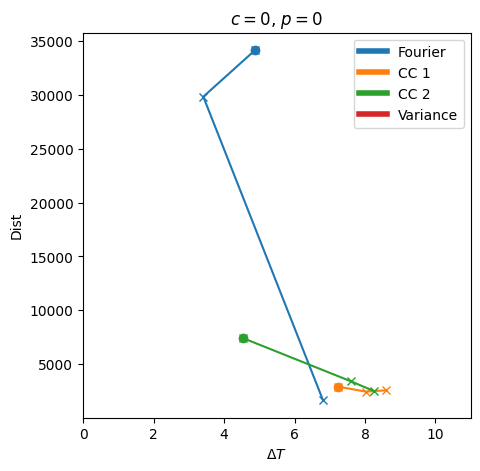

0 1


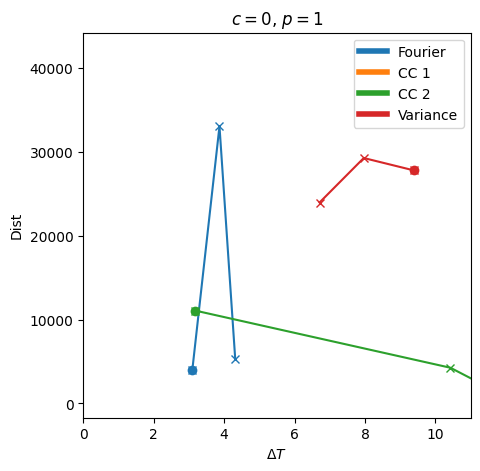

1 0


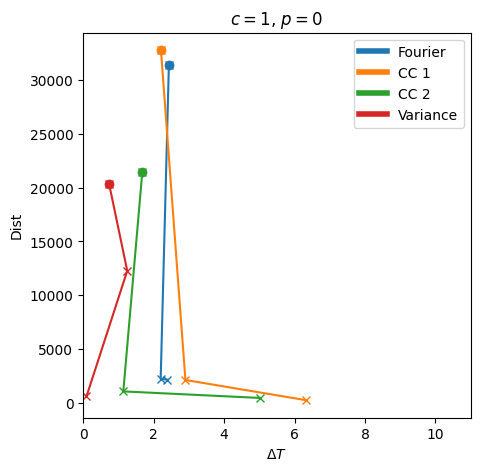

1 1


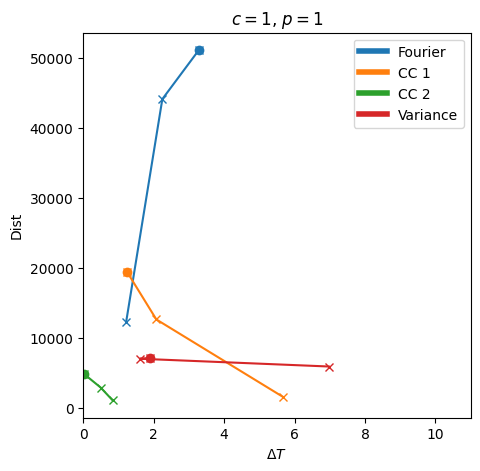

In [190]:
from matplotlib.lines import Line2D
custom_legend = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4)]

for c in range(len(cmats)):
    
    for pind in range(len(points)):
        print(c, pind)

        if [c, pind] in skip_array:
            continue

        fig, ax = plt.subplots(1, 1, figsize =(5, 5))

        for imet in range(4):

            delta_t = []
            dist = []

            for iw in range(w2_n):
                data = results["timings"][c][pind][imet][iw]
                ydata_ = []

                if data is None:
                    continue

                list_mean_dt = []

                for n1 in range(N):
                    list_dt = []
                    for n2 in range(N):
                        if n1 == n2:
                            continue
                        for p in data[n2][1:-1]:
                            list_dt.append(np.amin(np.abs(p - data[n1])) * dt)

                    list_mean_dt.append(np.mean(list_dt))

                delta_t.append(np.mean(list_mean_dt))
                dist.append(results["distance"][c,pind,imet,iw])

                if iw == 0:
                    ax.plot(delta_t, dist, marker="o", color=colors[imet])

            ax.plot(delta_t, dist, marker="x", color=colors[imet])

        ax.set_ylabel(r"Dist")
        ax.set_xlabel(r"$\Delta T$")

        ax.set_xlim(0,11)

        ax.set_title(r"$c = $" + str(c) +  r", $p = $" + str(pind))

        ax.legend(custom_legend, ['Fourier', 'CC 1', 'CC 2', 'Variance'])

        plt.show()
        fig.savefig(os.path.join(dir, "corr_aln_" + str(c) + "_" + str(pind) + ".png"), bbox_inches='tight')